In [1]:
import random
import numpy as np
import torch

from neuralee.embedding import NeuralEE
from neuralee.dataset import CortexDataset 
from neuralee._aux import scatter

%matplotlib inline

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

In [2]:
cortex_dataset = CortexDataset(save_path='data/')
cortex_dataset.log_shift()
cortex_dataset.subsample_genes(558)  
cortex_dataset.standardscale()

File ../data/expression.bin already downloaded
Preprocessing Cortex data
Finished preprocessing Cortex data
Downsampling from 19972 to 558 genes


Compute affinity, perplexity=20.0, on entire dataset
Elastic Embedding, lambda=1, completed in 2.88s, EE loss is 0.139524
Elastic Embedding, lambda=10, completed in 0.97s, EE loss is 0.494450
Compute affinity, perplexity=20.0, N_small=3005, on each batch
Neural Elastic Embedding, lambda=1, completed in 2.58s, EE loss is 0.139815
Neural Elastic Embedding, lambda=10, completed in 2.82s, EE loss is 0.502203
Compute affinity, perplexity=20.0, N_small=1502, on each batch
Neural Elastic Embedding, lambda=1, completed in 4.95s, EE loss is 0.147372
Neural Elastic Embedding, lambda=10, completed in 5.16s, EE loss is 0.524288
Compute affinity, perplexity=20.0, N_small=751, on each batch
Neural Elastic Embedding, lambda=1, completed in 9.53s, EE loss is 0.158217
Neural Elastic Embedding, lambda=10, completed in 9.78s, EE loss is 0.556380


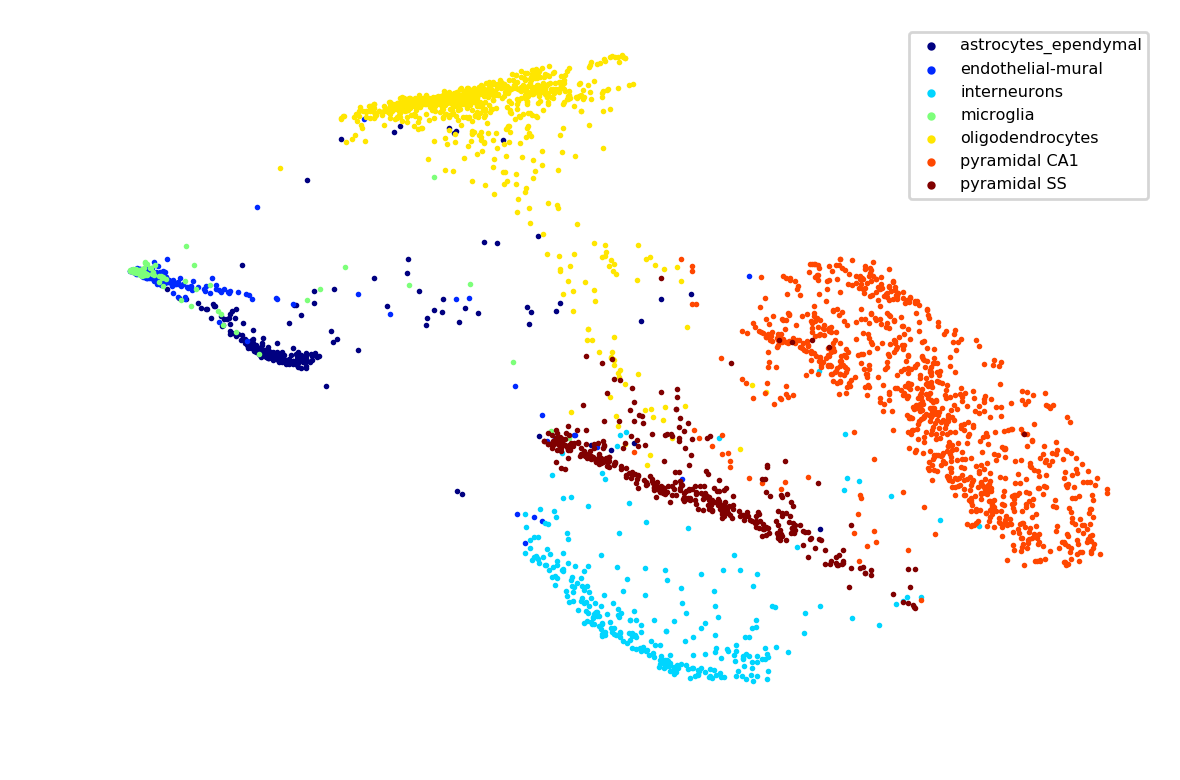

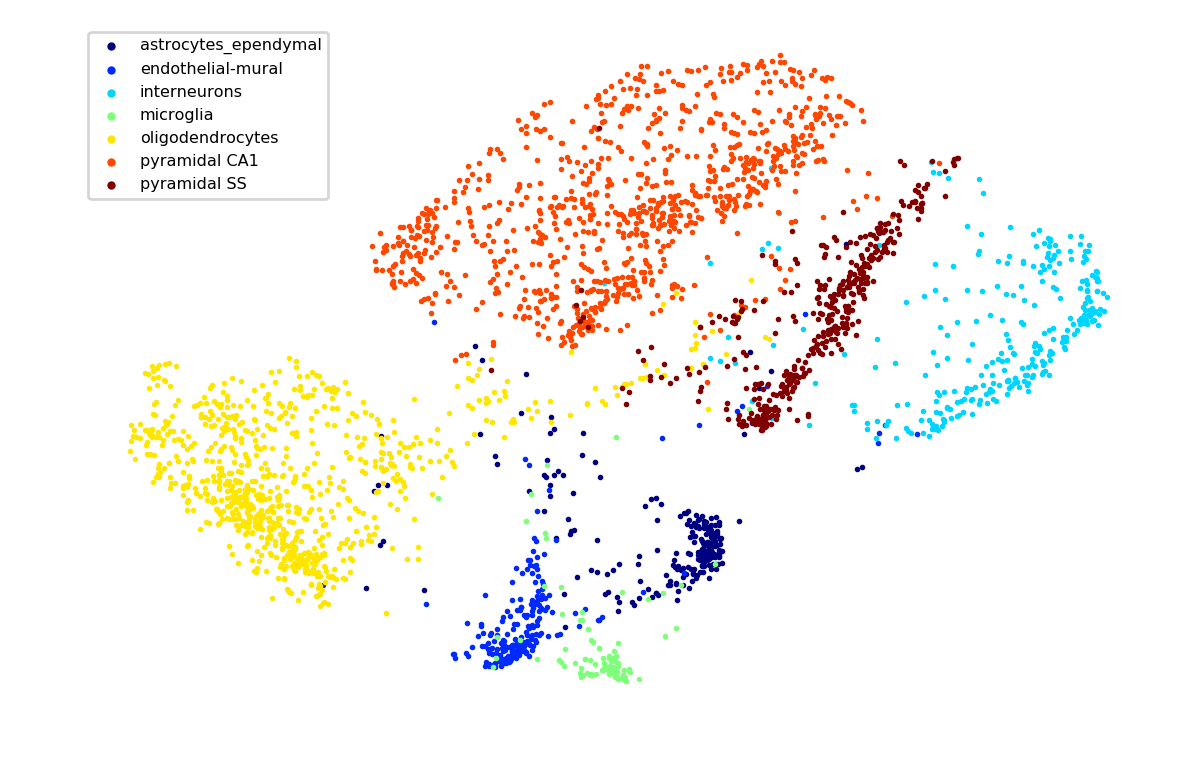

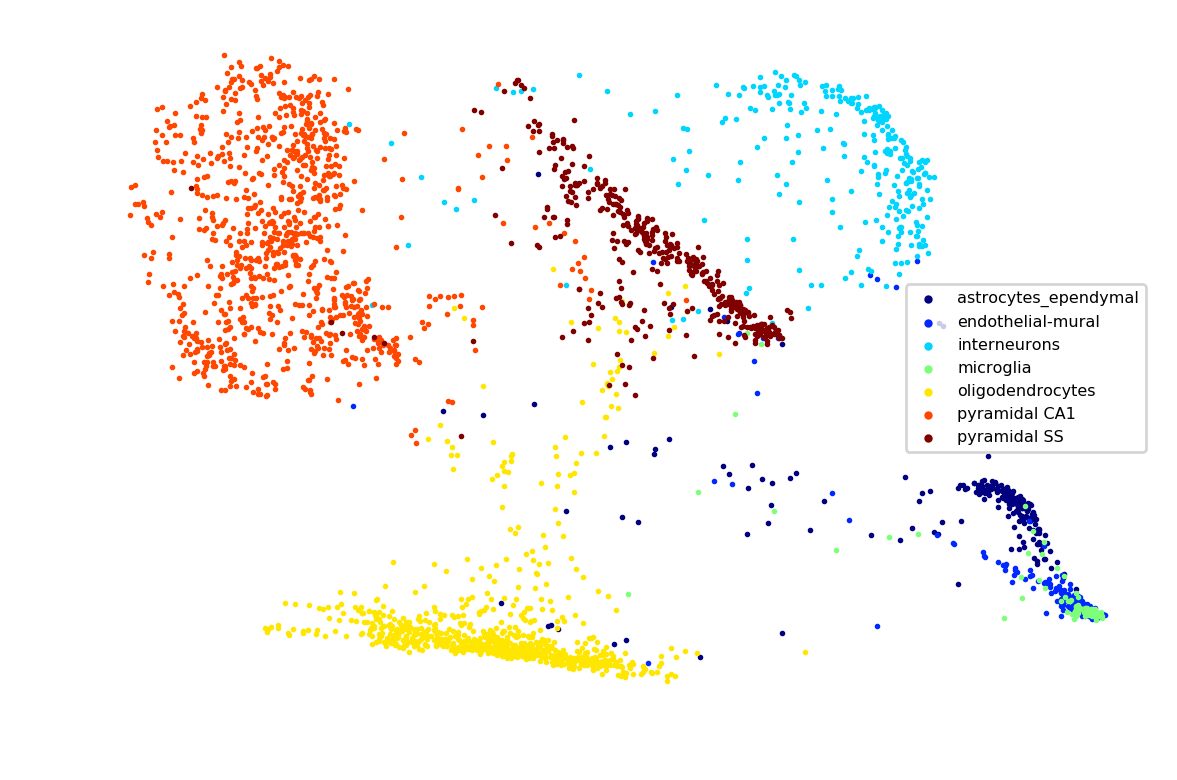

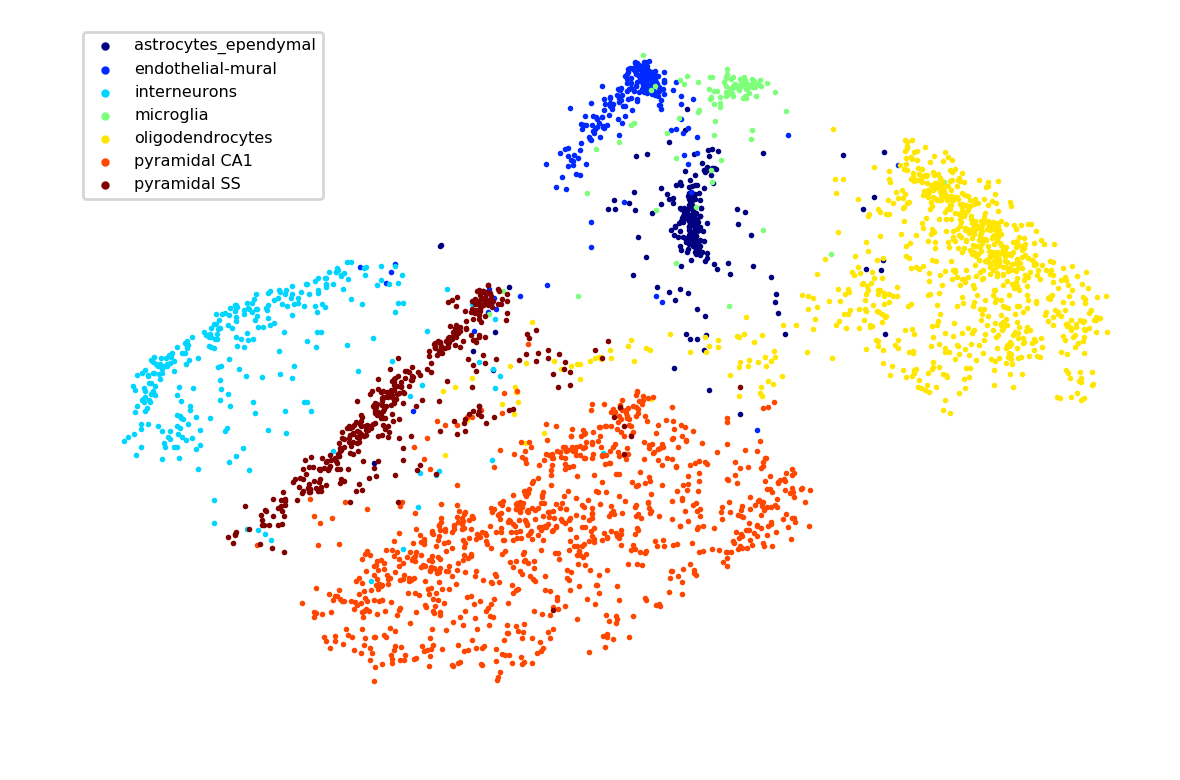

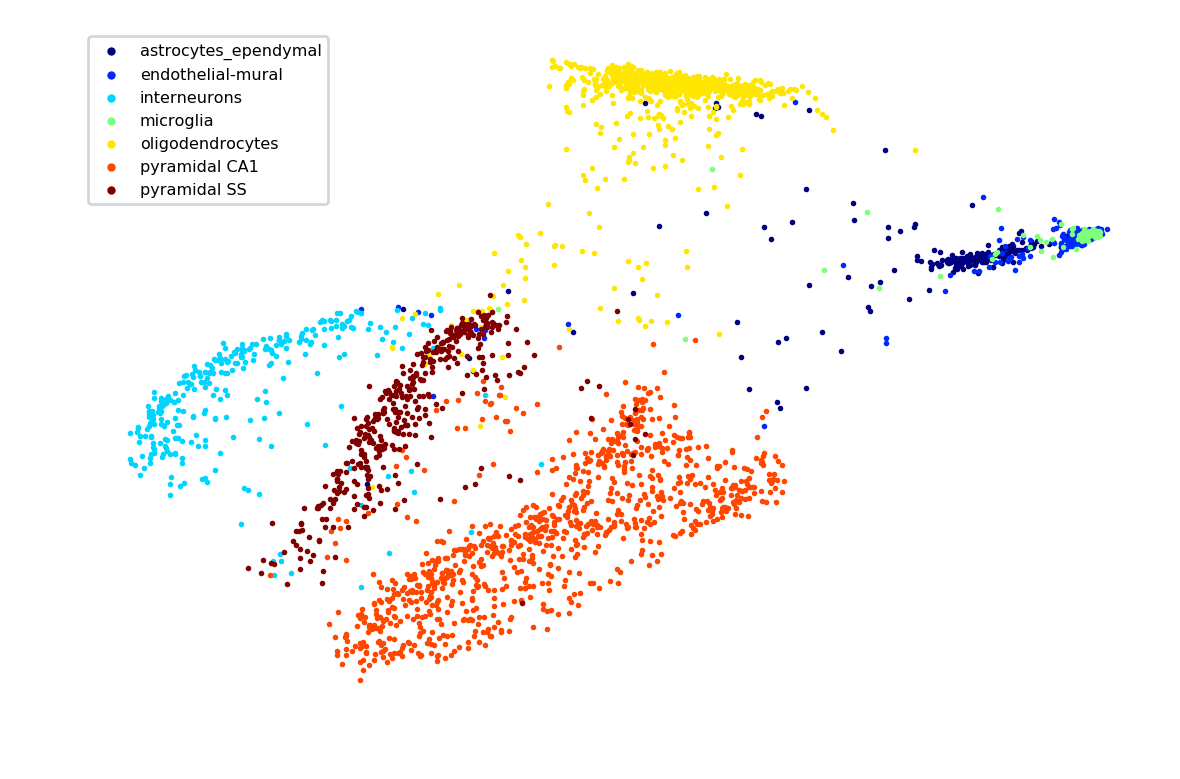

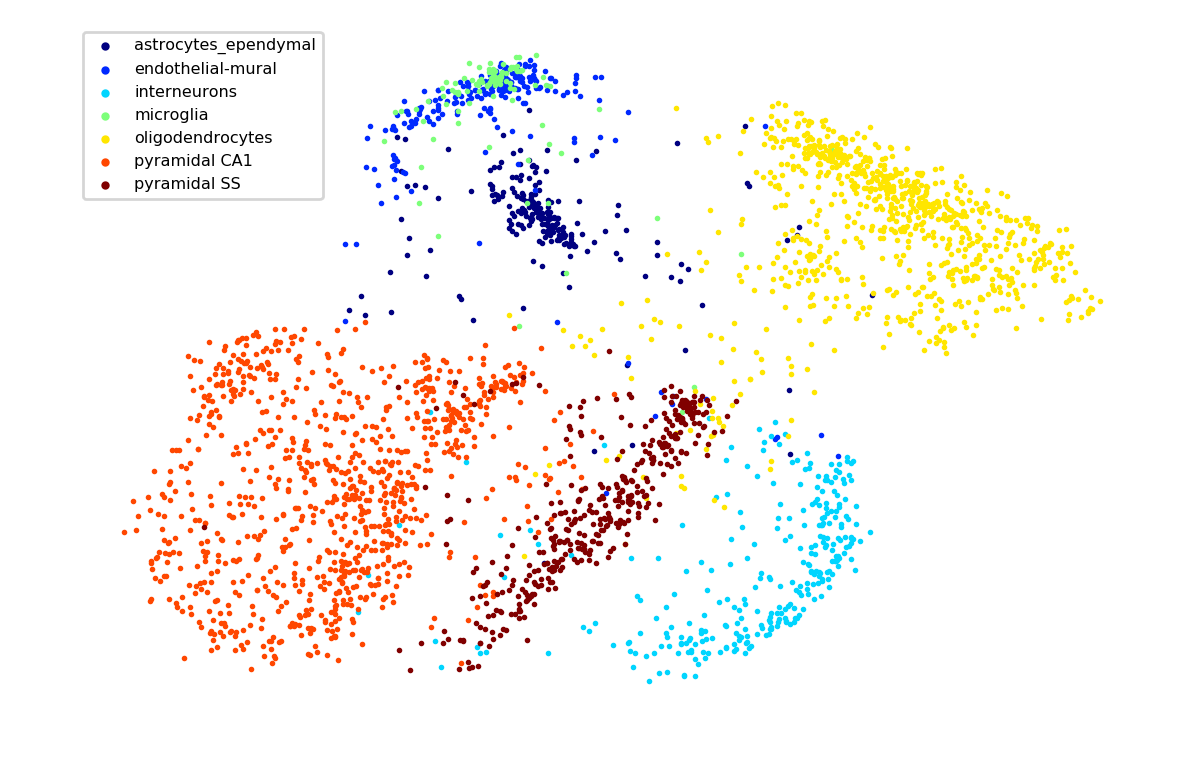

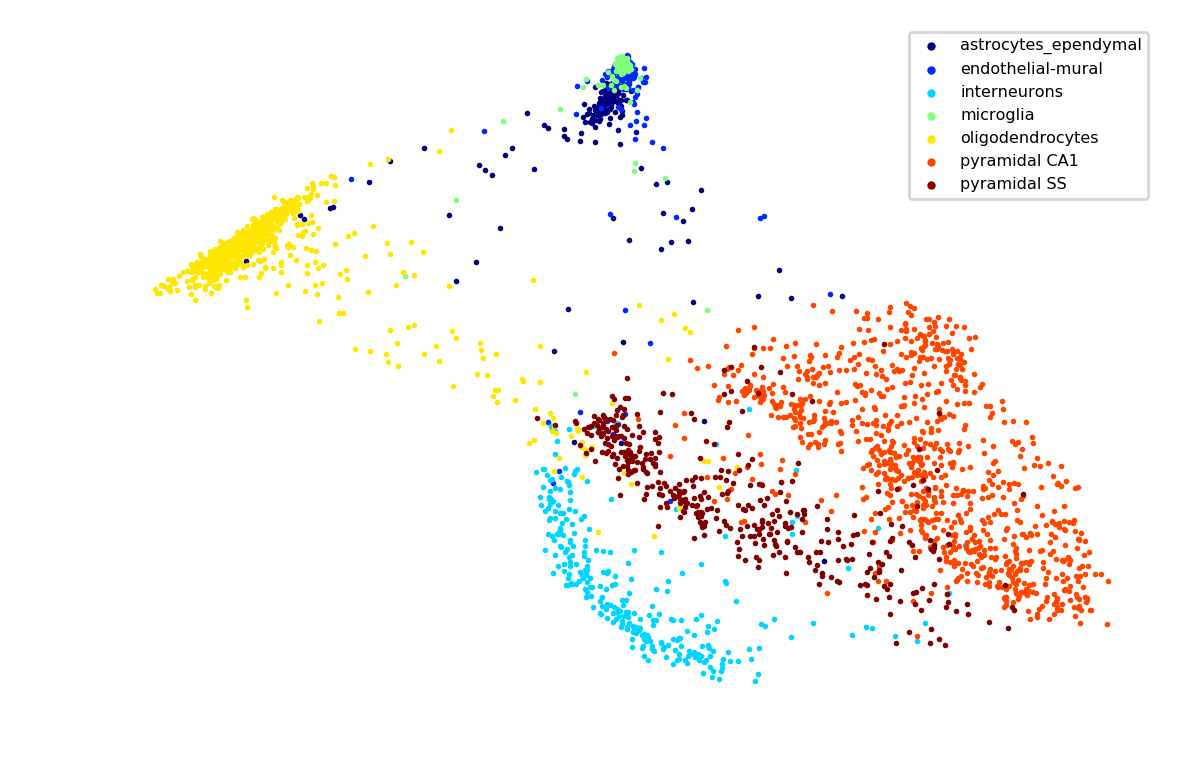

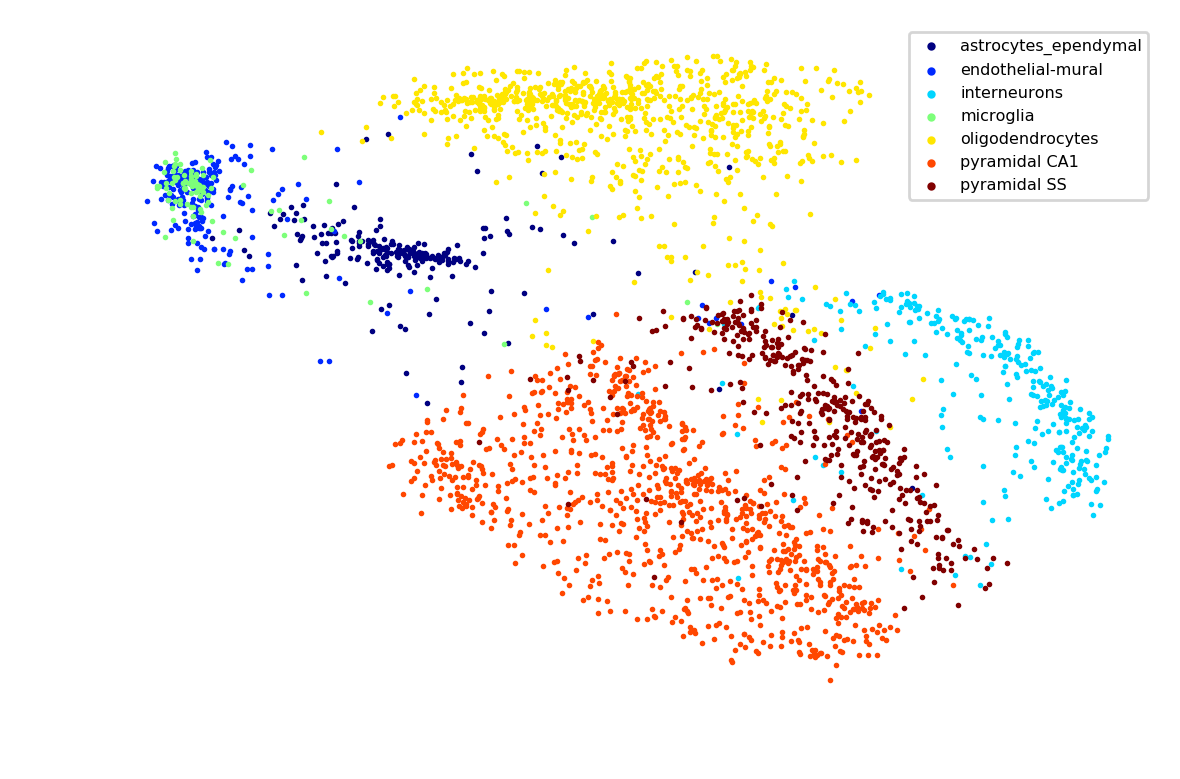

In [3]:
N_smalls = [1.0, 0.5, 0.25]
lams = [1, 10]

cortex_dataset.affinity()
for lam in lams:
    NEE = NeuralEE(cortex_dataset, lam=lam, device=device)
    results = NEE.EE() 
    scatter(results['X'].numpy(), NEE.labels, 
            cortex_dataset.cell_types)

for N_small in N_smalls:
    cortex_dataset.affinity_split(N_small=N_small)
    for lam in lams:
        NEE = NeuralEE(cortex_dataset, lam=lam, device=device)
        results_Neural = NEE.fine_tune()
        scatter(results_Neural['X'].numpy(), NEE.labels, 
                cortex_dataset.cell_types)